<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/Car-Insurance-Fraud-Detection/blob/main/Insuranceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [2]:
df = df.drop('policy_number',  axis = 1)
df = df.drop('_c39', axis = 1)


import numpy as np
#Deriving a feature months between 'policy bind date' and 'incident date'
df['incident_date'] = pd.to_datetime(df.incident_date)
df['policy_bind_date'] = pd.to_datetime(df.policy_bind_date)
df['months_bw_incident_and_bind'] = ((df.incident_date - df.policy_bind_date)/np.timedelta64(1, 'M'))
df['months_bw_incident_and_bind'] = df['months_bw_incident_and_bind'].astype(int)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,102
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,173
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,295
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,283
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,143
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,39


In [3]:
#Deriving a feature indicating whether months between policy bind date and incident date falls within months as customer
df['incident_within_customership'] = df[['months_bw_incident_and_bind','months_as_customer']].apply(lambda x: 1 if x.months_as_customer >= x.months_bw_incident_and_bind and x.months_bw_incident_and_bind > 0 else 0, axis=1)
df['capital-loss'] = df['capital-loss'].abs()
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,102,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,173,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,295,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,283,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,143,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,39,1


In [4]:
#Data Quality Check

#Check for consistency in data: Total claim must be equal to sum of "injury_claim", "property_claim", "vehicle_claim" and print the number of rows where it does not hold true
print (df[df['total_claim_amount'] != df['injury_claim'] + df['property_claim']+ df['vehicle_claim']].shape[0])

#Check for accepted range/set of values and print the number of rows where value < 0 in each numerical column
for i in dict(df.dtypes):
 if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==   'float64'):
  print(i , " : ", df[df[i]<0].shape[0])

0
months_as_customer  :  0
age  :  0
policy_deductable  :  0
policy_annual_premium  :  0
umbrella_limit  :  1
insured_zip  :  0
capital-gains  :  0
capital-loss  :  0
incident_hour_of_the_day  :  0
number_of_vehicles_involved  :  0
bodily_injuries  :  0
witnesses  :  0
total_claim_amount  :  0
injury_claim  :  0
property_claim  :  0
vehicle_claim  :  0
auto_year  :  0
months_bw_incident_and_bind  :  0
incident_within_customership  :  0


In [5]:
#Treating unaccepted value by row removal
df.drop(df.index[df[df['umbrella_limit']<0].index[0]], inplace = True)
print(df[df['umbrella_limit']<0].shape[0])

0


In [6]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,102,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,173,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,295,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,283,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,143,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,39,1


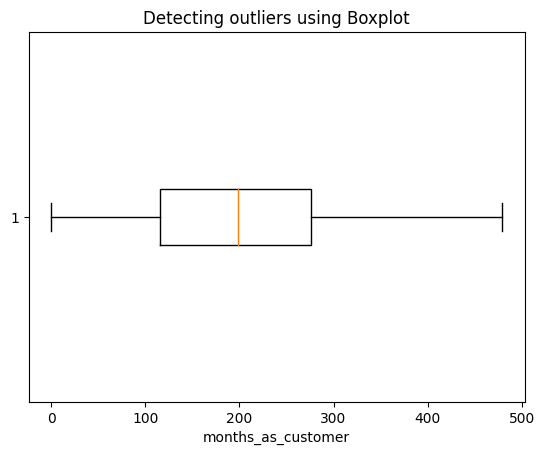

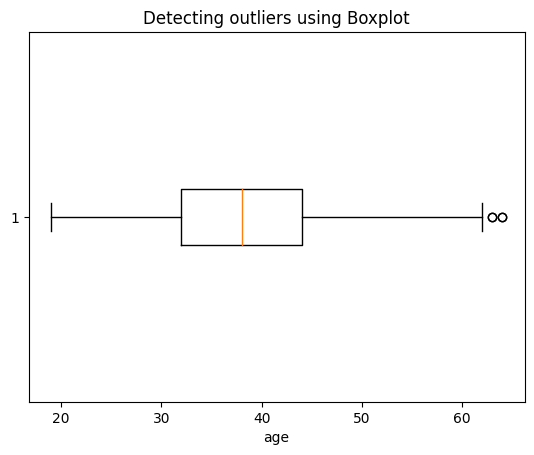

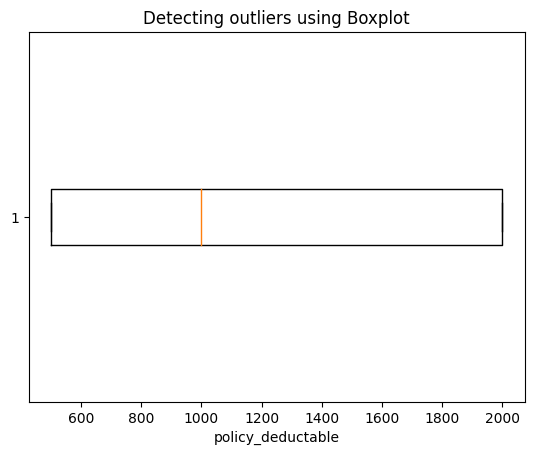

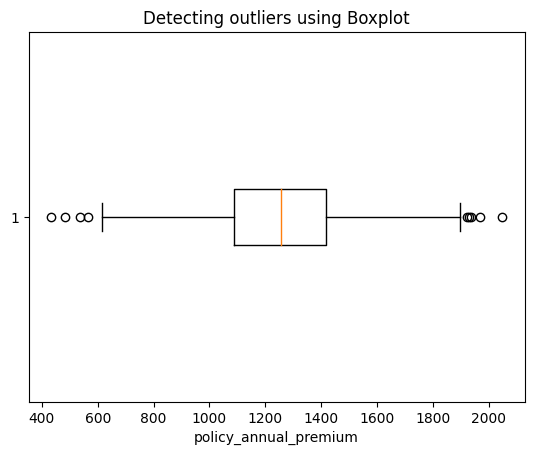

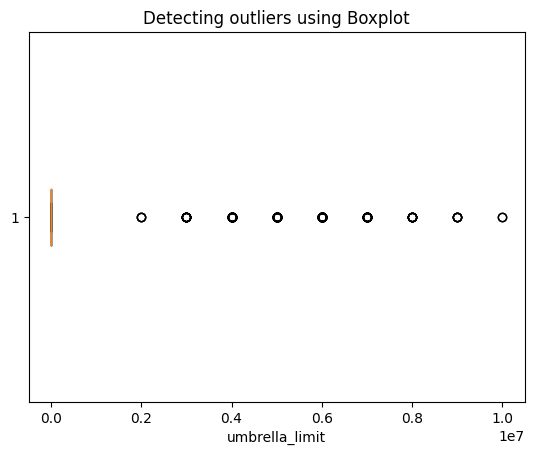

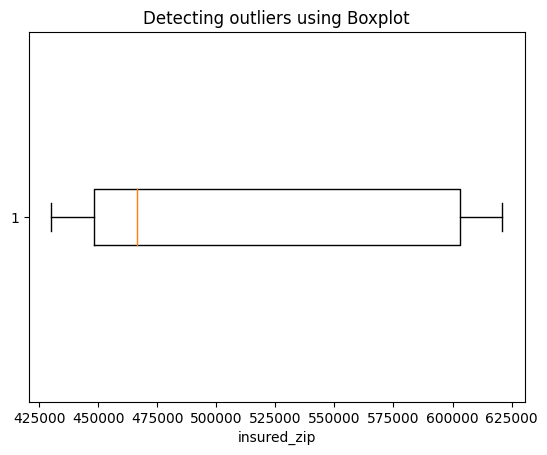

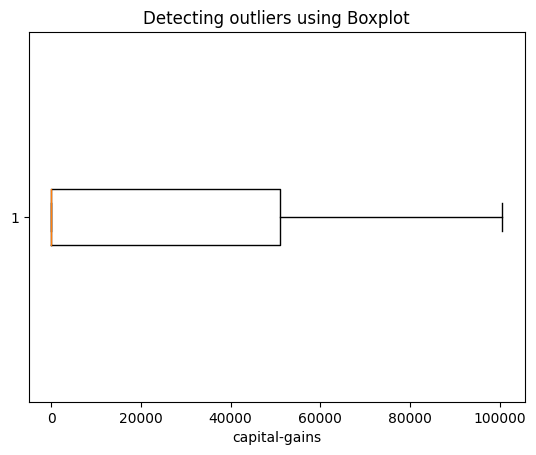

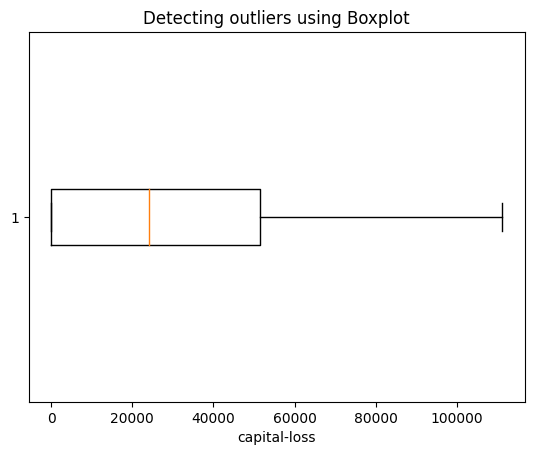

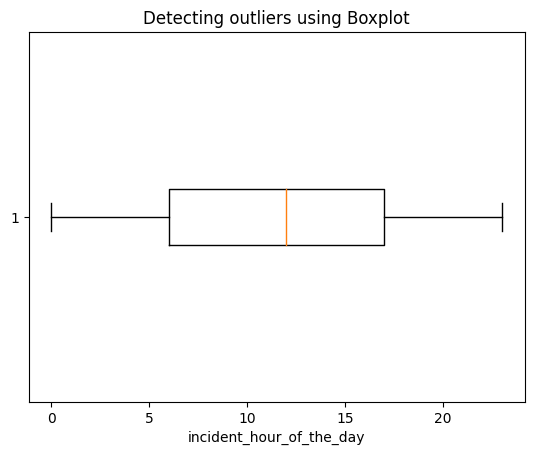

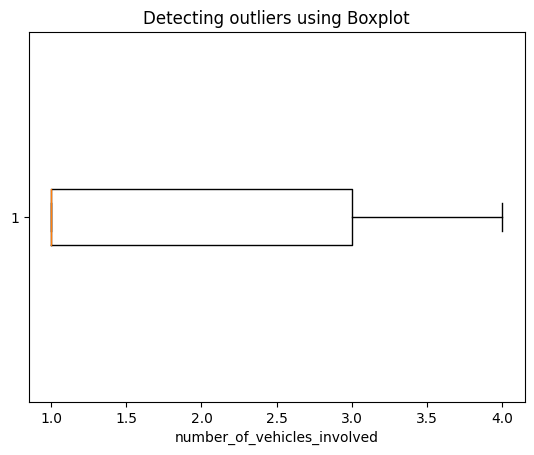

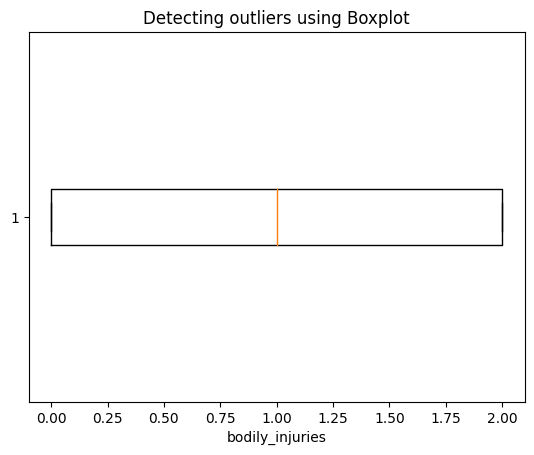

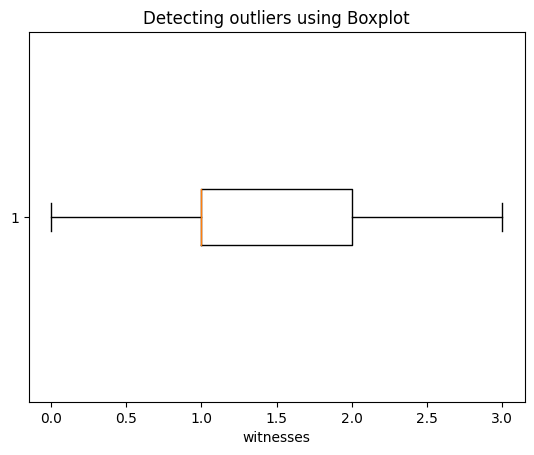

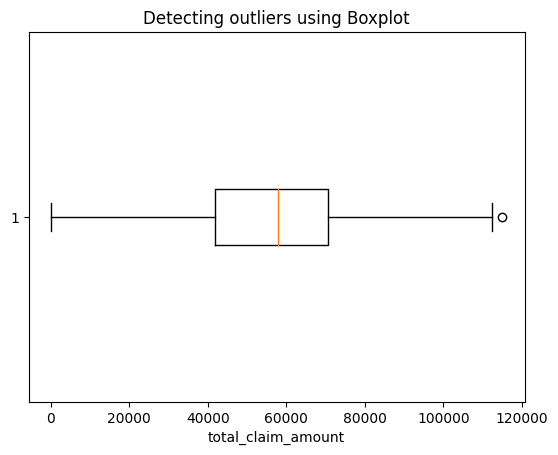

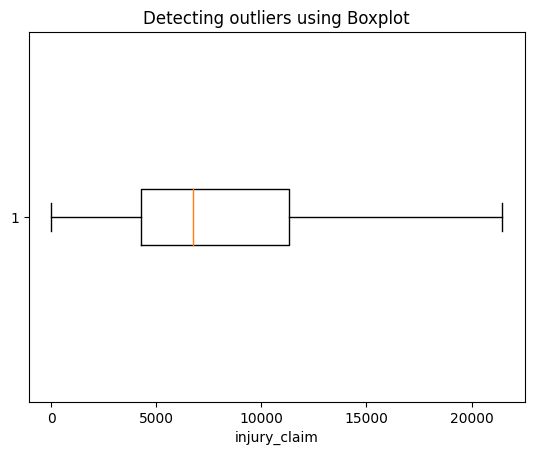

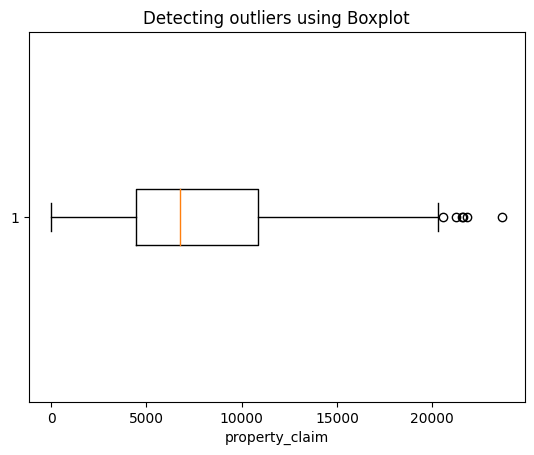

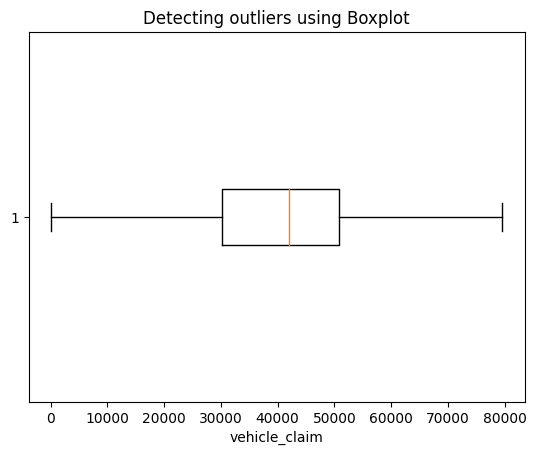

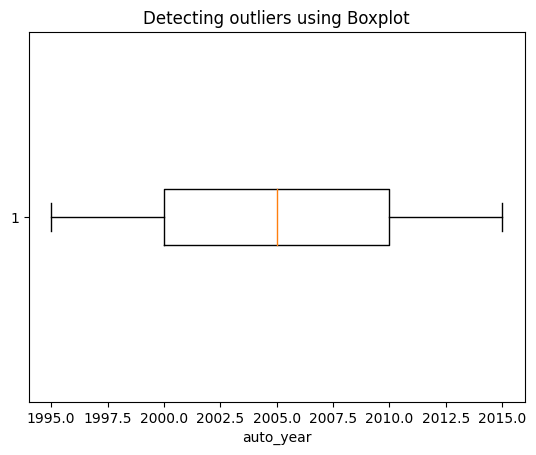

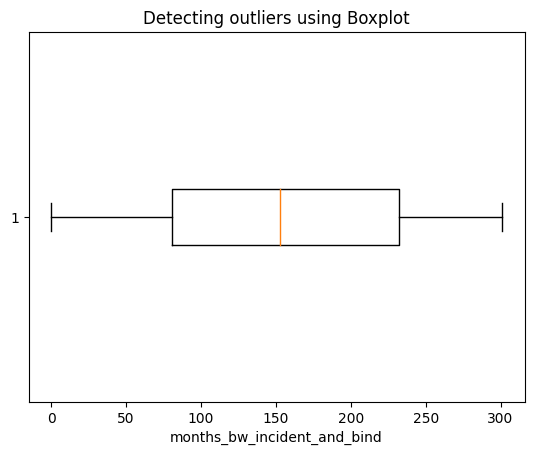

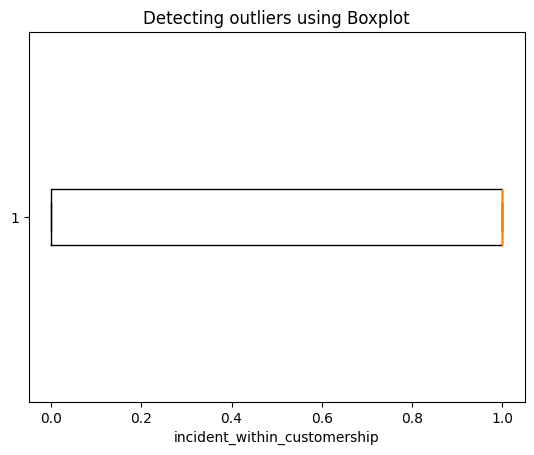

In [7]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [8]:
## Using the zscore to find out no.of outliers

import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers



In [9]:
df.dtypes


months_as_customer                       int64
age                                      int64
policy_bind_date                datetime64[ns]
policy_state                            object
policy_csl                              object
policy_deductable                        int64
policy_annual_premium                  float64
umbrella_limit                           int64
insured_zip                              int64
insured_sex                             object
insured_education_level                 object
insured_occupation                      object
insured_hobbies                         object
insured_relationship                    object
capital-gains                            int64
capital-loss                             int64
incident_date                   datetime64[ns]
incident_type                           object
collision_type                          object
incident_severity                       object
authorities_contacted                   object
incident_stat

In [10]:
dict(df.dtypes)

{'months_as_customer': dtype('int64'),
 'age': dtype('int64'),
 'policy_bind_date': dtype('<M8[ns]'),
 'policy_state': dtype('O'),
 'policy_csl': dtype('O'),
 'policy_deductable': dtype('int64'),
 'policy_annual_premium': dtype('float64'),
 'umbrella_limit': dtype('int64'),
 'insured_zip': dtype('int64'),
 'insured_sex': dtype('O'),
 'insured_education_level': dtype('O'),
 'insured_occupation': dtype('O'),
 'insured_hobbies': dtype('O'),
 'insured_relationship': dtype('O'),
 'capital-gains': dtype('int64'),
 'capital-loss': dtype('int64'),
 'incident_date': dtype('<M8[ns]'),
 'incident_type': dtype('O'),
 'collision_type': dtype('O'),
 'incident_severity': dtype('O'),
 'authorities_contacted': dtype('O'),
 'incident_state': dtype('O'),
 'incident_city': dtype('O'),
 'incident_location': dtype('O'),
 'incident_hour_of_the_day': dtype('int64'),
 'number_of_vehicles_involved': dtype('int64'),
 'property_damage': dtype('O'),
 'bodily_injuries': dtype('int64'),
 'witnesses': dtype('int64'),

In [11]:
# detecting the outliers and replacing them with median

for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  months_as_customer
Outliers from Z-scores method:  []
Column:  age
Outliers from Z-scores method:  []
Column:  policy_deductable
Outliers from Z-scores method:  []
Column:  policy_annual_premium
Outliers from Z-scores method:  [2047.59, 433.33, 484.67]
After treatment: 
Outliers from Z-scores method:  []
Column:  umbrella_limit
Outliers from Z-scores method:  [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
After treatment: 
Outliers from Z-scores method:  []
Column:  insured_zip
Outliers from Z-scores method:  []
Column:  capital-gains
Outliers from Z-scores method:  []
Column:  capital-loss
Outliers from Z-scores method:  [111100]
After treatment: 
Outliers from Z-scores method:  []
Column:  incident_hour_of_the_day
Outliers from Z-scores method:  []
Column:  number_of_vehicles_involved
Outliers from Z-scores method:  []
Column:  bodily_injuries
Outliers from Z-scores method:  []
Column:

In [12]:
df = df.replace("?", np.NaN)
for i in df.columns:
 print ("Column: ", i)
 print ("Number of nulls: ", df[i].isnull().sum())

Column:  months_as_customer
Number of nulls:  0
Column:  age
Number of nulls:  0
Column:  policy_bind_date
Number of nulls:  0
Column:  policy_state
Number of nulls:  0
Column:  policy_csl
Number of nulls:  0
Column:  policy_deductable
Number of nulls:  0
Column:  policy_annual_premium
Number of nulls:  0
Column:  umbrella_limit
Number of nulls:  0
Column:  insured_zip
Number of nulls:  0
Column:  insured_sex
Number of nulls:  0
Column:  insured_education_level
Number of nulls:  0
Column:  insured_occupation
Number of nulls:  0
Column:  insured_hobbies
Number of nulls:  0
Column:  insured_relationship
Number of nulls:  0
Column:  capital-gains
Number of nulls:  0
Column:  capital-loss
Number of nulls:  0
Column:  incident_date
Number of nulls:  0
Column:  incident_type
Number of nulls:  0
Column:  collision_type
Number of nulls:  178
Column:  incident_severity
Number of nulls:  0
Column:  authorities_contacted
Number of nulls:  0
Column:  incident_state
Number of nulls:  0
Column:  inc

In [13]:
#To distinguish between continuous and categorical columns. High number of unique values in a column indicative of the column being continuous, low number of unique value indicates it is a categorical column.
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                950
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           987
umbrella_limit                    7
insured_zip                     994
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    353
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location               999
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [14]:
#All values in this column are different
df = df.drop('incident_location', axis = 1)

#Missing values here are treated with Mode imputation as values were missing in categorical columns
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [15]:
#Encoding

mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0.0,466132,0,...,71610,6510,13020.0,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000.0,468176,0,...,5070,780,780.0,3510,1,1,2007,0,102,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000.0,430632,1,...,34650,7700,3850.0,23100,2,2,2007,1,173,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000.0,608117,1,...,63400,6340,6340.0,50720,3,3,2014,0,295,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000.0,610706,0,...,6500,1300,650.0,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0.0,431289,1,...,87200,17440,8720.0,61040,12,31,2006,1,283,0
996,285,41,2014-01-05,2,1,1000,1436.79,0.0,608177,1,...,108480,18080,18080.0,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000.0,442797,1,...,67500,7500,7500.0,52500,9,17,1996,1,143,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000.0,441714,0,...,46980,5220,5220.0,36540,6,7,1998,1,39,1


In [16]:
## this code is the breakdown of the encoding no need to consider in the code

df['policy_state'].unique()

array([0, 1, 2])

In [17]:
## this code is the breakdown of the encoding no need to consider in the code

range(len(df['policy_state'].unique()))

range(0, 3)

In [18]:
## this code is the breakdown of the encoding no need to consider in the code

dict(zip(df['policy_state'].unique(), range(len(df['policy_state'].unique()))))

{0: 0, 1: 1, 2: 2}

<ipython-input-19-05bb576e285e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


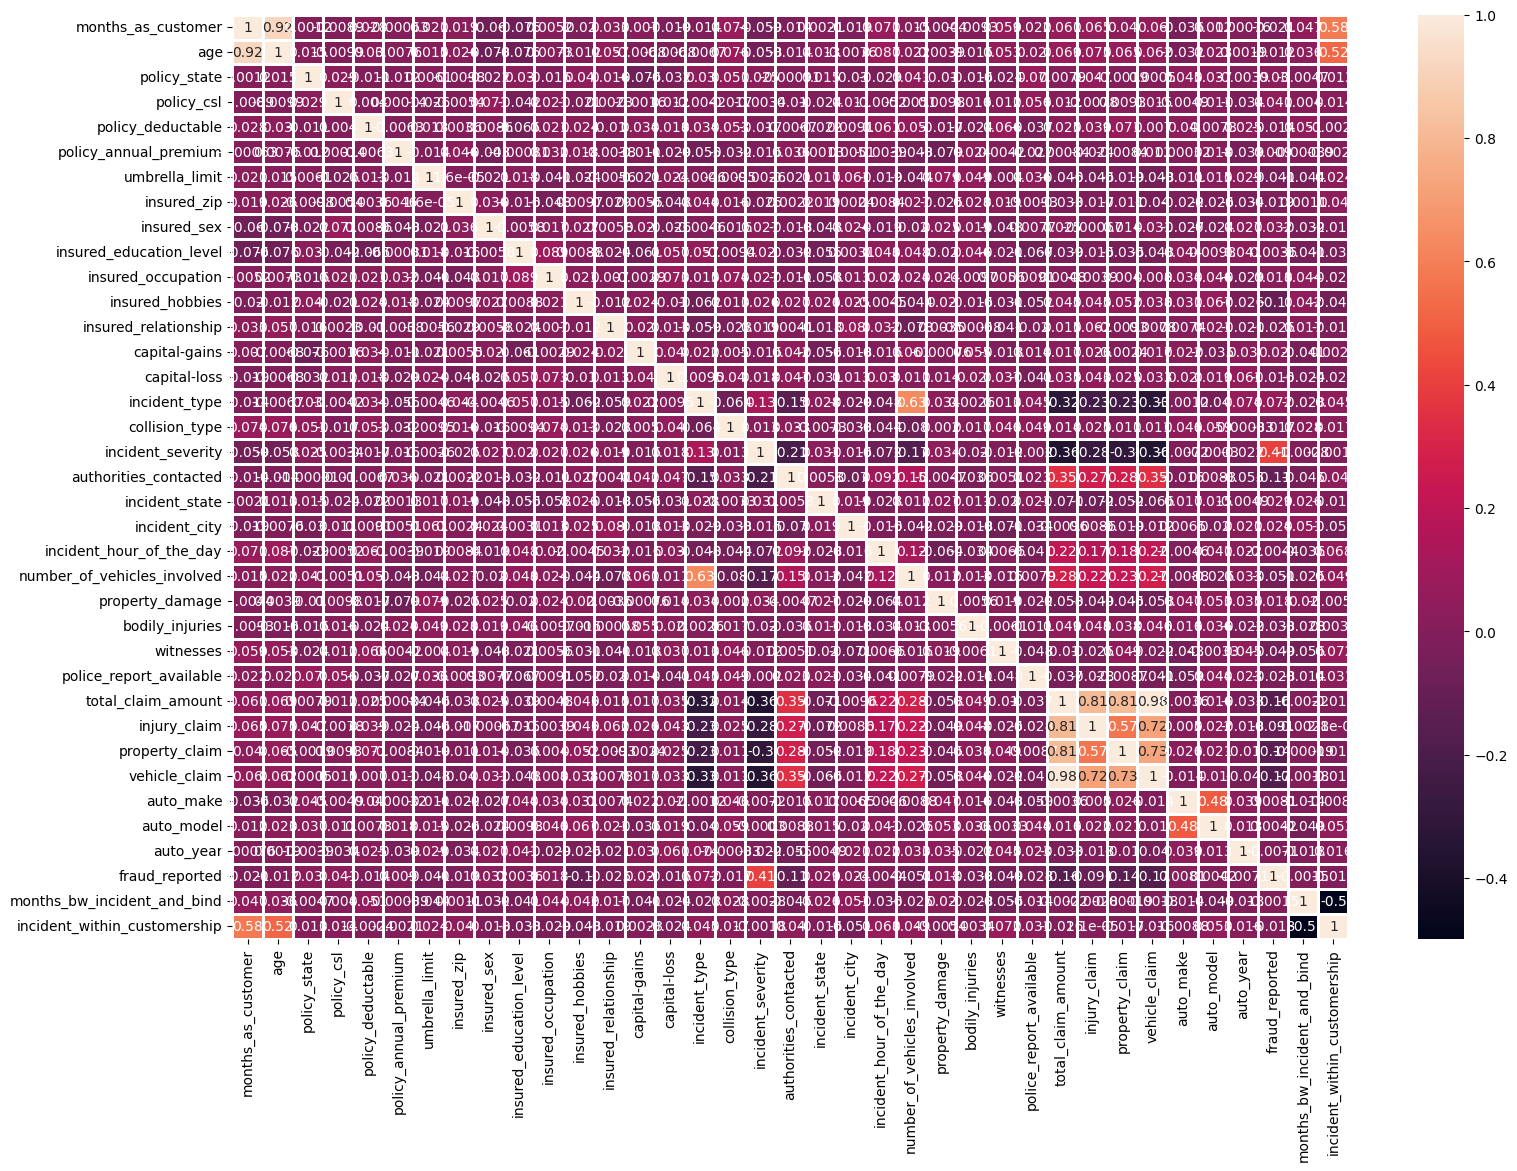

In [19]:
#Feature selection


import seaborn as sns
plt.figure(figsize = (18, 12))
corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [20]:
 #as its correlation with another feature (total_claim_amount) > 95%. Keeping multiple strongly correlated featured would make the collection of such features influential
df = df.drop('vehicle_claim', axis =1)  # already run this code


In [21]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0.0,466132,0,...,0,71610,6510,13020.0,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000.0,468176,0,...,1,5070,780,780.0,1,1,2007,0,102,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000.0,430632,1,...,1,34650,7700,3850.0,2,2,2007,1,173,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000.0,608117,1,...,1,63400,6340,6340.0,3,3,2014,0,295,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000.0,610706,0,...,1,6500,1300,650.0,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0.0,431289,1,...,1,87200,17440,8720.0,12,31,2006,1,283,0
996,285,41,2014-01-05,2,1,1000,1436.79,0.0,608177,1,...,1,108480,18080,18080.0,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000.0,442797,1,...,0,67500,7500,7500.0,9,17,1996,1,143,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000.0,441714,0,...,0,46980,5220,5220.0,6,7,1998,1,39,1


In [22]:
df = df.drop(['policy_bind_date', 'incident_date'], axis = 1) #as information from these features has been exported to new derived features

In [23]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,0,0,1000,1406.91,0.0,466132,0,0,...,0,71610,6510,13020.0,0,0,2004,0,3,1
1,228,42,1,0,2000,1197.22,5000000.0,468176,0,0,...,1,5070,780,780.0,1,1,2007,0,102,1
2,134,29,0,1,2000,1413.14,5000000.0,430632,1,1,...,1,34650,7700,3850.0,2,2,2007,1,173,0
3,256,41,2,0,2000,1415.74,6000000.0,608117,1,1,...,1,63400,6340,6340.0,3,3,2014,0,295,0
4,228,44,2,2,1000,1583.91,6000000.0,610706,0,2,...,1,6500,1300,650.0,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,0.0,431289,1,3,...,1,87200,17440,8720.0,12,31,2006,1,283,0
996,285,41,2,1,1000,1436.79,0.0,608177,1,1,...,1,108480,18080,18080.0,13,27,2015,1,12,1
997,130,34,0,0,500,1383.49,3000000.0,442797,1,3,...,0,67500,7500,7500.0,9,17,1996,1,143,0
998,458,62,2,2,2000,1356.92,5000000.0,441714,0,2,...,0,46980,5220,5220.0,6,7,1998,1,39,1


In [24]:
# Feature important chart

from sklearn.ensemble import ExtraTreesClassifier

In [25]:
x = df.drop('fraud_reported', axis = 1)

In [26]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_bw_incident_and_bind,incident_within_customership
0,328,48,0,0,1000,1406.91,0.0,466132,0,0,...,2,0,71610,6510,13020.0,0,0,2004,3,1
1,228,42,1,0,2000,1197.22,5000000.0,468176,0,0,...,0,1,5070,780,780.0,1,1,2007,102,1
2,134,29,0,1,2000,1413.14,5000000.0,430632,1,1,...,3,1,34650,7700,3850.0,2,2,2007,173,0
3,256,41,2,0,2000,1415.74,6000000.0,608117,1,1,...,2,1,63400,6340,6340.0,3,3,2014,295,0
4,228,44,2,2,1000,1583.91,6000000.0,610706,0,2,...,1,1,6500,1300,650.0,4,4,2009,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,0.0,431289,1,3,...,1,1,87200,17440,8720.0,12,31,2006,283,0
996,285,41,2,1,1000,1436.79,0.0,608177,1,1,...,3,1,108480,18080,18080.0,13,27,2015,12,1
997,130,34,0,0,500,1383.49,3000000.0,442797,1,3,...,3,0,67500,7500,7500.0,9,17,1996,143,0
998,458,62,2,2,2000,1356.92,5000000.0,441714,0,2,...,1,0,46980,5220,5220.0,6,7,1998,39,1


In [27]:
y = df['fraud_reported']

In [28]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 999, dtype: int64

In [29]:
etcm = ExtraTreesClassifier()
etcm.fit(x,y)
print(etcm.feature_importances_)

[0.02665501 0.02632195 0.02191462 0.02228659 0.02218343 0.02741464
 0.01804657 0.02929633 0.01627353 0.02627684 0.02905328 0.04097121
 0.0246695  0.0226653  0.02370797 0.01715738 0.02203046 0.1628424
 0.02561984 0.02834833 0.02667789 0.02627703 0.01660523 0.01653527
 0.02405463 0.02444214 0.01684752 0.0293969  0.02917267 0.03199115
 0.02597989 0.0263501  0.02713869 0.02855566 0.01624003]


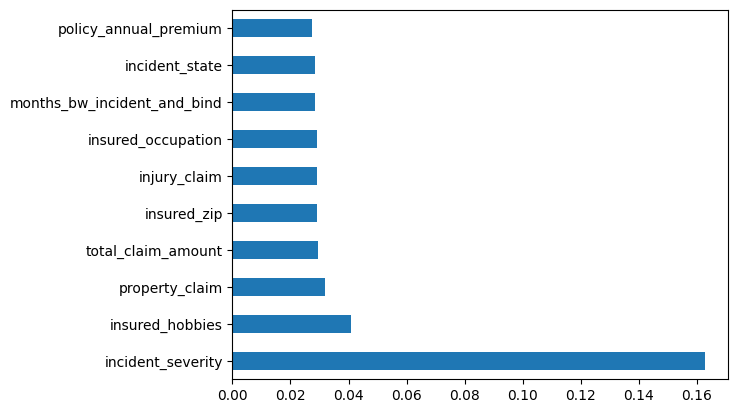

In [30]:
#Finding 10 most important features

feature_importances = pd.Series(etcm.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

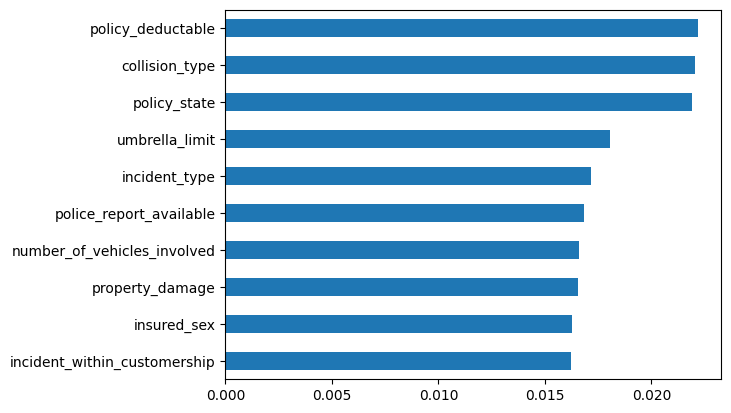

In [31]:
#Finding 10 least important features

feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

In [32]:
#Not selecting columns with importance < 0.02
df = df.drop(['collision_type','property_damage', 'incident_within_customership', 'insured_sex', 'umbrella_limit', 'number_of_vehicles_involved', 'police_report_available', 'incident_type'], axis = 1)

In [33]:
# The final dataset is which we get after all the data quality handiling are called Analytical dataset (AD)

In [34]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,1,2,71610,6510,13020.0,0,0,2004,0,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,0,0,5070,780,780.0,1,1,2007,0,102
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,2,3,34650,7700,3850.0,2,2,2007,1,173
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,1,2,63400,6340,6340.0,3,3,2014,0,295
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,0,1,6500,1300,650.0,4,4,2009,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,431289,3,0,12,...,0,1,87200,17440,8720.0,12,31,2006,1,283
996,285,41,2,1,1000,1436.79,608177,1,5,0,...,2,3,108480,18080,18080.0,13,27,2015,1,12
997,130,34,0,0,500,1383.49,442797,3,3,3,...,2,3,67500,7500,7500.0,9,17,1996,1,143
998,458,62,2,2,2000,1356.92,441714,2,11,4,...,0,1,46980,5220,5220.0,6,7,1998,1,39


In [35]:
print(mappings['fraud_reported'])

{'Y': 0, 'N': 1}


In [36]:
y[y == 0].shape[0]

247

In [37]:
y[y == 1].shape[0]

752

fraud_reported :  {'Y': 0, 'N': 1}
incident_severity :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3}
fraud_reported       0    1
incident_severity          
0                  167  108
1                   38  316
2                   36  244
3                    6   84

fraud_reported :  {'Y': 0, 'N': 1}
insured_hobbies :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}
fraud_reported    0   1
insured_hobbies        
0                 8  33
1                17  47
2                14  34
3                 9  47
4                13  36
5                 6  49
6                 5  50
7                 5  38
8                11  38
9                 9  46
10               12  40
11               1

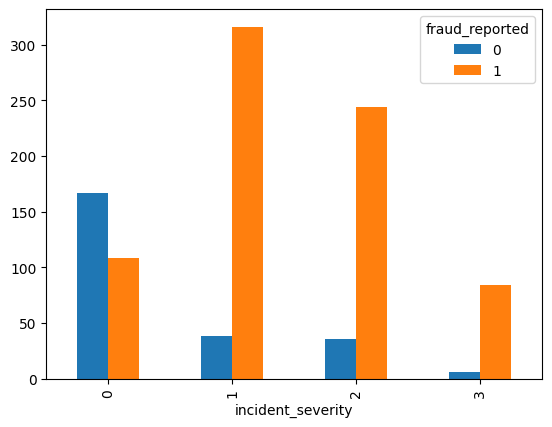

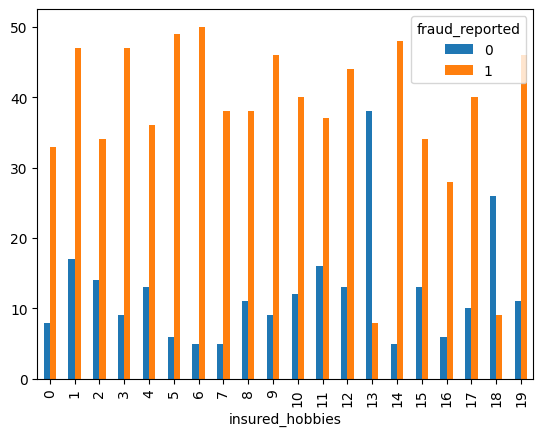

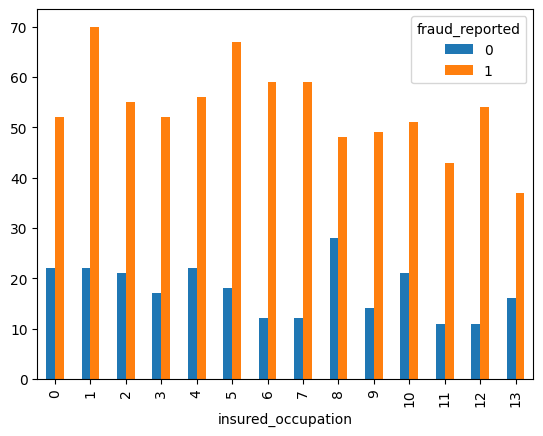

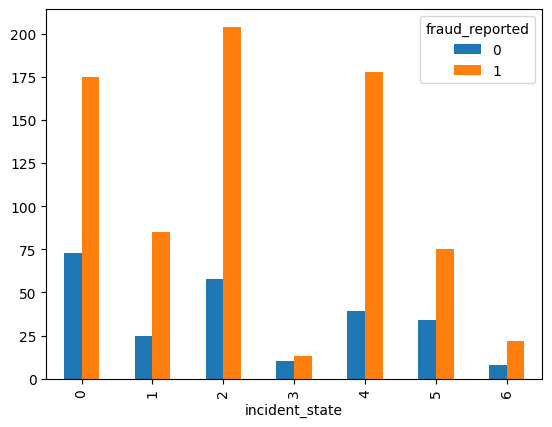

In [38]:
for i in dict(feature_importances.nlargest(10)):
 if i in mappings:
  chart = pd.crosstab(index=df[i],columns=df['fraud_reported'])
  print('fraud_reported' + ' : ', mappings['fraud_reported'])
  print(i + ' : ', mappings[i])
  print(chart)
  print()
  chart.plot.bar()

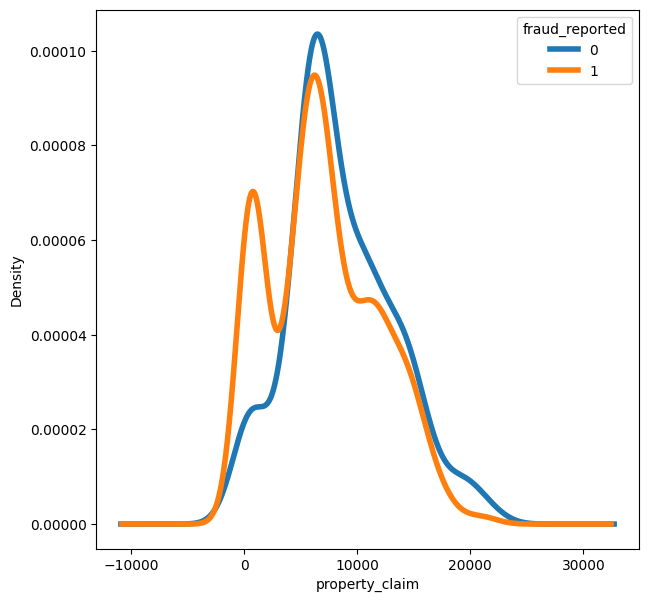

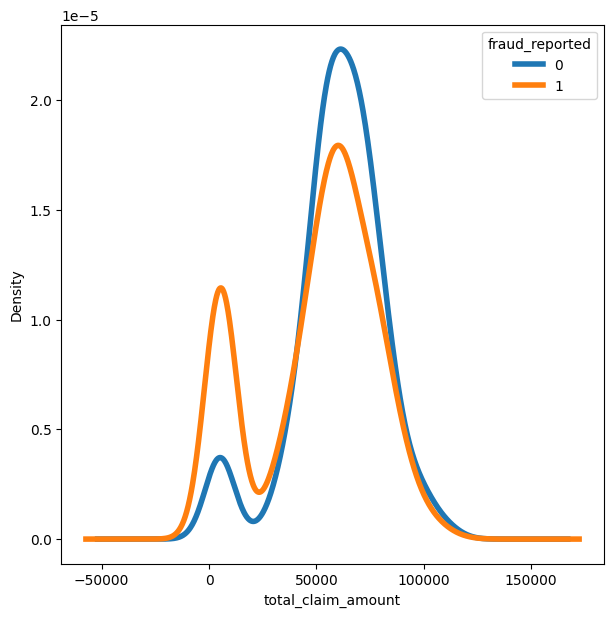

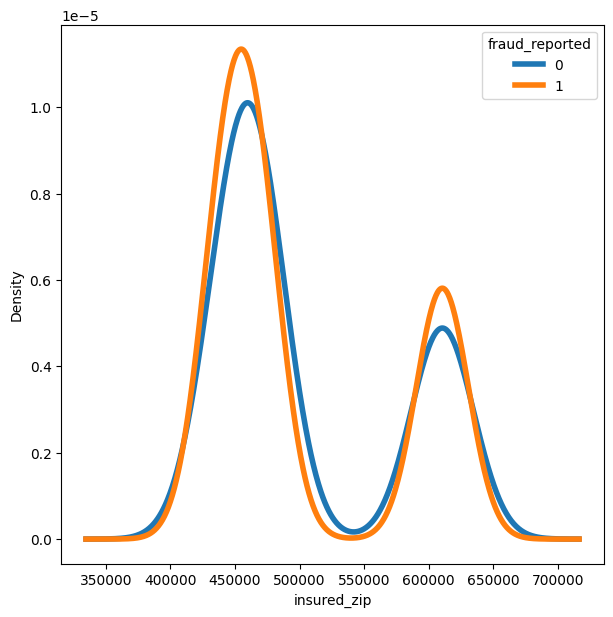

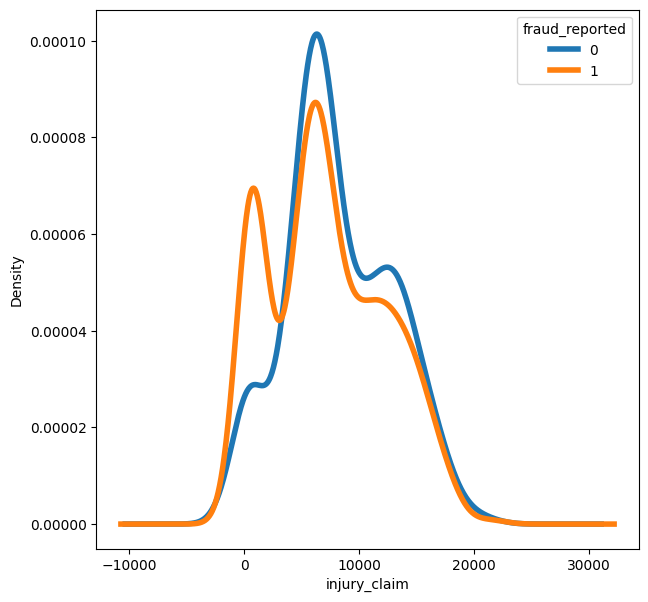

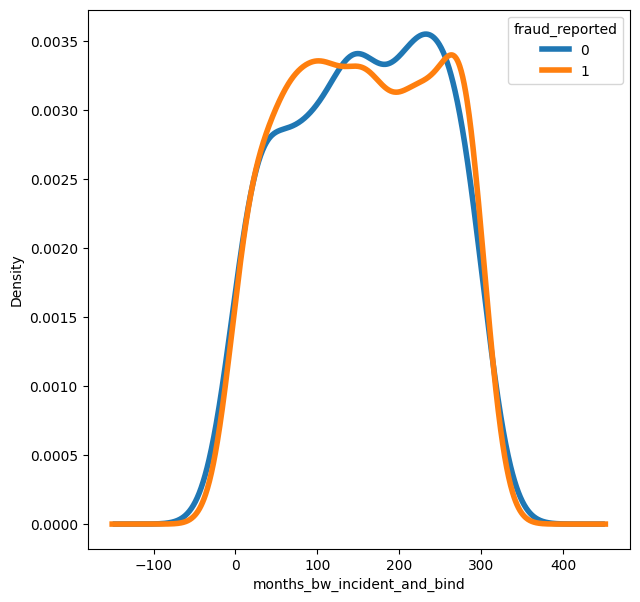

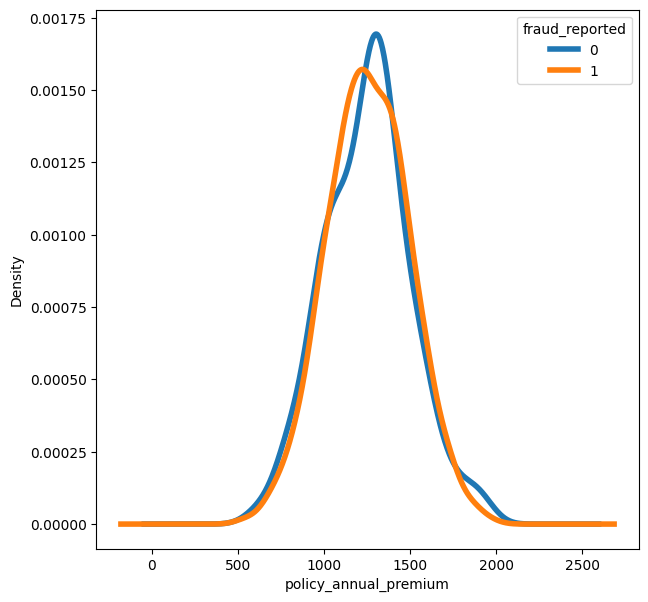

In [39]:
for i in dict(feature_importances.nlargest(10)):
 if i not in mappings:
  df_specific_column = df.pivot(columns = 'fraud_reported', values = i)
  df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(i)

In [40]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,1,2,71610,6510,13020.0,0,0,2004,0,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,0,0,5070,780,780.0,1,1,2007,0,102
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,2,3,34650,7700,3850.0,2,2,2007,1,173
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,1,2,63400,6340,6340.0,3,3,2014,0,295
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,0,1,6500,1300,650.0,4,4,2009,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,431289,3,0,12,...,0,1,87200,17440,8720.0,12,31,2006,1,283
996,285,41,2,1,1000,1436.79,608177,1,5,0,...,2,3,108480,18080,18080.0,13,27,2015,1,12
997,130,34,0,0,500,1383.49,442797,3,3,3,...,2,3,67500,7500,7500.0,9,17,1996,1,143
998,458,62,2,2,2000,1356.92,441714,2,11,4,...,0,1,46980,5220,5220.0,6,7,1998,1,39


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = df['fraud_reported']

x = df.drop('fraud_reported', axis =1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [44]:
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_bw_incident_and_bind
779,446,61,1,2,1000,1037.32,438837,4,4,8,...,1,2,1,80880,6740,13480.0,5,37,2005,108
286,163,31,1,1,1000,1004.63,460359,6,7,10,...,14,2,0,63910,5810,11620.0,9,18,1999,153
165,108,29,1,2,1000,1337.92,441536,1,3,3,...,4,2,2,61380,11160,5580.0,9,15,2012,86
961,128,35,1,0,1000,1074.99,453620,2,12,3,...,16,2,0,7590,1380,690.0,4,13,2012,164
494,338,47,0,0,2000,1486.04,615688,2,3,2,...,1,2,3,64100,12820,6410.0,2,2,2014,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,464,61,0,2,1000,1125.37,604450,2,5,16,...,6,0,2,79800,6650,19950.0,0,5,2000,291
270,369,55,0,0,2000,1589.54,444734,5,11,6,...,6,2,0,85300,17060,8530.0,7,11,2003,21
861,212,40,2,2,1000,1524.45,452438,3,6,5,...,17,0,2,82400,8240,8240.0,5,6,2006,144
436,61,23,2,1,500,1111.72,448857,6,8,3,...,6,1,2,41850,4650,4650.0,9,15,1997,95


In [45]:
x_test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_bw_incident_and_bind
454,126,30,2,0,2000,1171.75,472163,2,1,2,...,23,2,3,48730,4430,4430.0,3,33,2011,27
794,320,48,2,0,2000,1730.49,443342,5,10,10,...,13,2,0,56160,4680,9360.0,0,5,1995,20
209,404,53,1,0,500,767.14,466201,2,2,1,...,8,0,1,8800,1760,880.0,9,15,2002,1
310,253,41,0,1,2000,1312.75,471453,1,2,7,...,10,2,2,80740,7340,14680.0,7,8,2014,20
741,100,33,0,0,500,1124.59,459428,5,12,5,...,4,1,2,40800,6800,6800.0,10,25,2004,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,194,39,0,2,1000,1489.24,608335,6,6,14,...,15,2,2,8060,1240,1240.0,0,5,2004,56
29,241,45,2,2,2000,1104.50,432211,1,1,16,...,5,2,2,91650,14100,14100.0,4,16,2011,11
277,264,41,0,1,500,1411.30,474801,1,5,18,...,4,1,0,60390,10980,5490.0,10,24,2004,147
261,156,31,2,1,2000,1134.08,446895,1,6,1,...,3,2,0,59000,5900,5900.0,8,34,2013,220


In [46]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [47]:
lrg = LogisticRegression()
lrg = lrg.fit(x_train,y_train)
pred = lrg.predict(x_test)


print('Accuracy: ', accuracy_score(y_test, pred))
print('\n classification report: \n' , classification_report(y_test, pred))
print('\n confussion matrix:\n', confusion_matrix(y_test, pred))

Accuracy:  0.765

 classification report: 
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.76      1.00      0.87       152

    accuracy                           0.77       200
   macro avg       0.88      0.51      0.45       200
weighted avg       0.82      0.77      0.67       200


 confussion matrix:
 [[  1  47]
 [  0 152]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
predk = knn.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predk))
print ('\n clasification report:\n', classification_report(y_test, predk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predk))


Accuracy: 0.74

 clasification report:
               precision    recall  f1-score   support

           0       0.38      0.12      0.19        48
           1       0.77      0.93      0.85       152

    accuracy                           0.74       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.68      0.74      0.69       200


 confussion matrix:
 [[  6  42]
 [ 10 142]]


In [49]:
# Navis based classifier

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc = nbc.fit(x_train, y_train)
predn = nbc.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predn))
print ('\n clasification report:\n', classification_report(y_test, predn))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predn))

Accuracy: 0.735

 clasification report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.18        48
           1       0.77      0.93      0.84       152

    accuracy                           0.73       200
   macro avg       0.56      0.53      0.51       200
weighted avg       0.67      0.73      0.68       200


 confussion matrix:
 [[  6  42]
 [ 11 141]]


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
predd = dtc.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predd))
print ('\n clasification report:\n', classification_report(y_test, predd))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predd))

Accuracy: 0.73

 clasification report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.53        48
           1       0.87      0.76      0.81       152

    accuracy                           0.73       200
   macro avg       0.66      0.69      0.67       200
weighted avg       0.77      0.73      0.74       200


 confussion matrix:
 [[ 30  18]
 [ 36 116]]


In [51]:
from sklearn.ensemble import RandomForestClassifier
radf = RandomForestClassifier()
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.77

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49        48
           1       0.84      0.87      0.85       152

    accuracy                           0.77       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.76      0.77      0.76       200


 confussion matrix:
 [[ 22  26]
 [ 20 132]]


In [52]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(x_train, y_train)
predx = model.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, predx))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predx))

Accuracy: 0.765

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60        48
           1       0.88      0.86      0.87       152

    accuracy                           0.80       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.81      0.80      0.80       200


 confussion matrix:
 [[ 30  18]
 [ 22 130]]


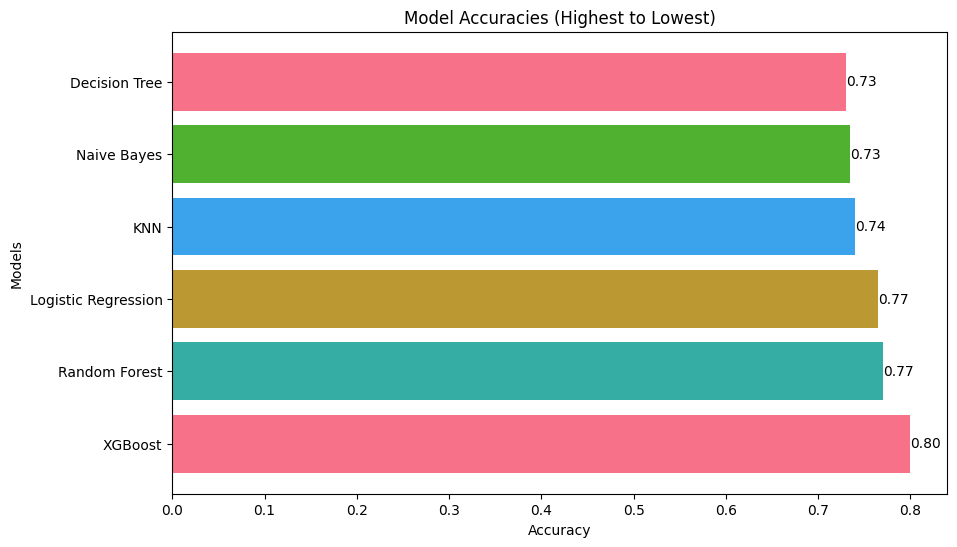

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# List of models
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']

# List of accuracy scores
accuracies = [
    accuracy_score(y_test, pred),
    accuracy_score(y_test, predk),
    accuracy_score(y_test, predn),
    accuracy_score(y_test, predd),
    accuracy_score(y_test, predr),
    accuracy_score(y_test, predx)
]

# Sort models and accuracies in descending order
sorted_indices = np.argsort(accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Generate random colors
random_colors = [sns.color_palette('husl', n_colors=len(models))[random.randint(0, len(models) - 1)] for _ in models]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_models, sorted_accuracies, color=random_colors)
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Models')

# Display accuracy values on each bar
for bar, acc in zip(bars, sorted_accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc:.2f}', va='center')

plt.show()




In [54]:
# Predictive model building

# Hyper parameter optimization

from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 'n_estimators': [100, 500, 1000], 'colsample_bytree': [0.3, 0.7, 1], 'subsample': [0.3, 0.7, 1],}
xgbC = XGBClassifier()
optimize_model = GridSearchCV(estimator=xgbC, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 1}


In [55]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.01, max_depth = 10, n_estimators = 1000, subsample = 1)
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.81

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.73      0.65        48
           1       0.91      0.84      0.87       152

    accuracy                           0.81       200
   macro avg       0.75      0.78      0.76       200
weighted avg       0.83      0.81      0.82       200


 confussion matrix:
 [[ 35  13]
 [ 25 127]]


[0.         0.00657895 0.375      0.375      0.41447368 0.41447368
 0.53947368 0.53947368 0.60526316 0.60526316 0.75657895 0.75657895
 0.78947368 0.78947368 0.82236842 0.82236842 0.82894737 0.82894737
 0.83552632 0.83552632 0.84210526 0.84210526 0.85526316 0.85526316
 0.86184211 0.86184211 0.875      0.875      0.88157895 0.88157895
 0.89473684 0.89473684 0.90131579 0.90131579 0.90789474 0.90789474
 0.91447368 0.91447368 0.92105263 0.92105263 0.93421053 0.93421053
 0.94736842 0.94736842 0.95394737 0.95394737 0.96052632 0.96052632
 0.96710526 0.96710526 0.97368421 0.97368421 0.98684211 0.98684211
 0.99342105 0.99342105 1.        ]
[0.         0.         0.         0.04166667 0.04166667 0.0625
 0.0625     0.08333333 0.08333333 0.10416667 0.10416667 0.125
 0.125      0.14583333 0.14583333 0.1875     0.1875     0.20833333
 0.20833333 0.29166667 0.29166667 0.3125     0.3125     0.35416667
 0.35416667 0.45833333 0.45833333 0.47916667 0.47916667 0.5625
 0.5625     0.58333333 0.58333333 0.6041

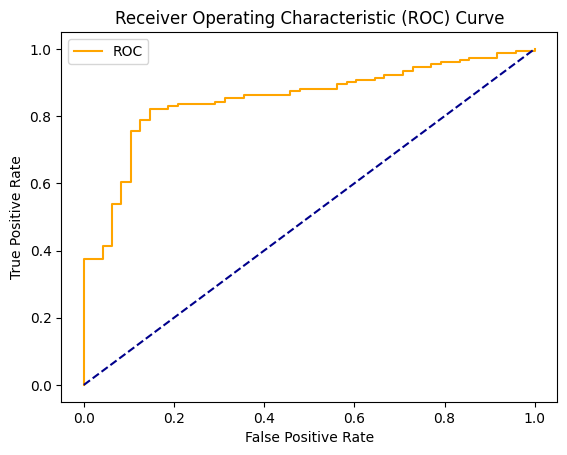

In [56]:
pred_prob = model.predict_proba(x_test)[:,1]

from sklearn import metrics
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()


y_true = y_test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [57]:
pred = 1 * (pred_prob> optimal_threshold)

print('Accuracy: ', accuracy_score(y_test,pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, pred))

Accuracy:  0.825

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.85      0.70        48
           1       0.95      0.82      0.88       152

    accuracy                           0.82       200
   macro avg       0.77      0.83      0.79       200
weighted avg       0.86      0.82      0.83       200


 confussion matrix:
 [[ 41   7]
 [ 28 124]]
